In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [6]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [7]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [9]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
train_filna = df.fillna({'HomePlanet':'Earth', 
                      'CryoSleep':False,
                      'Destination':'TRAPPIST-1e',
                      'Age':28.827930,
                      'VIP':False,
                      'RoomService':0,
                      'FoodCourt':0,
                      'ShoppingMall':0,
                      'Spa': 0,
                      'VRDeck':0})

In [10]:
train_filna_df = pd.get_dummies(train_filna.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1), drop_first=True)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaled_train_filna_df = scaler.fit_transform(train_filna_df)

In [14]:
scaled_train_filna_df = pd.DataFrame(data=scaled_train_filna_df, columns=['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'])

In [15]:
scaled_train_filna_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,1.0,0.0,0.0,1.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,1.0,0.0,0.0,1.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.0,0.0,0.0,1.0


Calculate the "X_zero value" (which is the the number of all features minus the scaled value of each feature)

In [19]:
train_filna['X_zero'] = len(scaled_train_filna_df.columns) - scaled_train_filna_df.CryoSleep - scaled_train_filna_df.Age - scaled_train_filna_df.VIP - scaled_train_filna_df.RoomService - scaled_train_filna_df.FoodCourt - scaled_train_filna_df.ShoppingMall - scaled_train_filna_df.Spa - scaled_train_filna_df.VRDeck - scaled_train_filna_df.HomePlanet_Europa - scaled_train_filna_df.HomePlanet_Mars - scaled_train_filna_df['Destination_PSO J318.5-22'] - scaled_train_filna_df['Destination_TRAPPIST-1e']  

Text(0, 0.5, 'X_zero value')

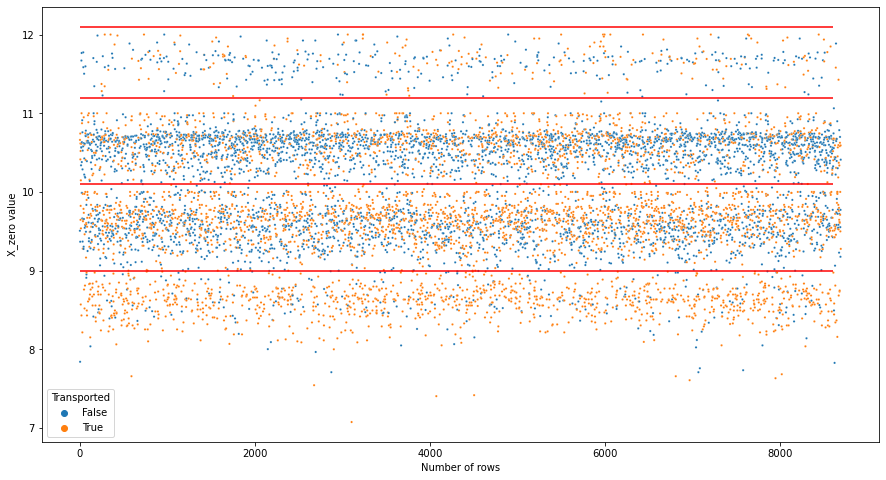

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=train_filna, x=range(len(train_filna)), y=train_filna.X_zero.values, hue='Transported',s=5)
plt.hlines(9, xmin=0, xmax=8600,colors='red')
plt.hlines(10.1, xmin=0, xmax=8600,colors='red')
plt.hlines(11.2, xmin=0, xmax=8600,colors='red')
plt.hlines(12.1, xmin=0, xmax=8600,colors='red')
plt.xlabel('Number of rows')
plt.ylabel('X_zero value')

We can see that the data can be divided onto some regions with different intervals of value of "X_zero" value 

Let's try to find more explicit intervals of 'X_zero' value that divide the data more clearly

Delete from the 'X_zero' value the "Age" and "HomePlanet" features 

In [31]:
train_filna['X_zero'] = len(scaled_train_filna_df.columns)-1 - scaled_train_filna_df.CryoSleep - scaled_train_filna_df.VIP - scaled_train_filna_df.RoomService - scaled_train_filna_df.FoodCourt - scaled_train_filna_df.ShoppingMall - scaled_train_filna_df.Spa - scaled_train_filna_df.VRDeck - scaled_train_filna_df['Destination_PSO J318.5-22'] - scaled_train_filna_df['Destination_TRAPPIST-1e']  

Text(0, 0.5, 'X_zero value')

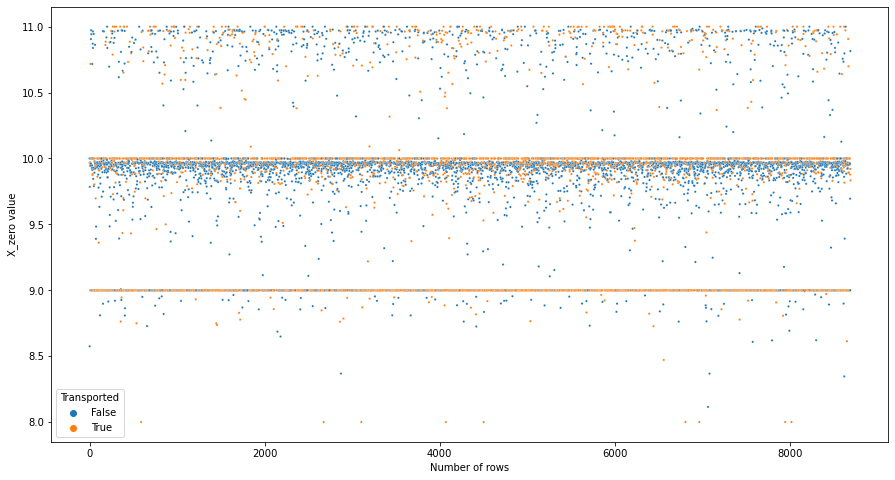

In [27]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=train_filna, x=range(len(train_filna)), y=train_filna.X_zero.values, hue='Transported',s=5)
plt.xlabel('Number of rows')
plt.ylabel('X_zero value')

Delete from the 'X_zero' value the "Age" feature (the distribution is pictured for comparison)

In [28]:
train_filna['X_zero'] = len(scaled_train_filna_df.columns)-1 - scaled_train_filna_df.CryoSleep - scaled_train_filna_df.VIP - scaled_train_filna_df.RoomService - scaled_train_filna_df.FoodCourt - scaled_train_filna_df.ShoppingMall - scaled_train_filna_df.Spa - scaled_train_filna_df.VRDeck - scaled_train_filna_df.HomePlanet_Europa - scaled_train_filna_df.HomePlanet_Mars - scaled_train_filna_df['Destination_PSO J318.5-22'] - scaled_train_filna_df['Destination_TRAPPIST-1e']  

Text(0, 0.5, 'X_zero value')

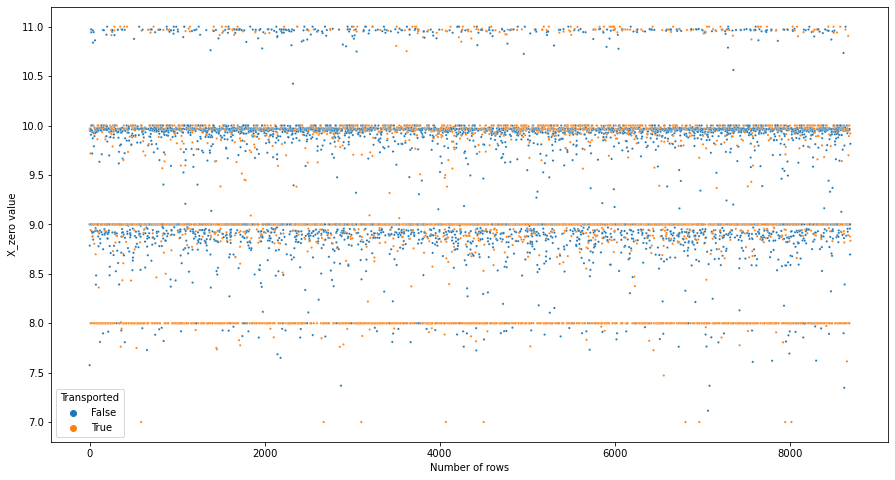

In [30]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=train_filna, x=range(len(train_filna)), y=train_filna.X_zero.values, hue='Transported',s=5)
plt.xlabel('Number of rows')
plt.ylabel('X_zero value')

Let's try to predict the categories based on 'X_zero' value without "Age" and "HomePlanet" features and for intervals calculate the ratio of the "Transported" category. Intervals have been chosen based on "X_zero" distribution across all rows in train set (see the previous figure).

In [32]:
train_filna[(train_filna['X_zero'] < 10) & (train_filna['X_zero'] > 9)].Transported.value_counts()

False    2871
True     1157
Name: Transported, dtype: int64

In [33]:
2871/(2871+ 1157)

0.7127606752730884

In [34]:
train_filna[train_filna['X_zero'] == 10].Transported.value_counts()

True     972
False    246
Name: Transported, dtype: int64

In [35]:
972/(972+ 246)

0.7980295566502463

In [36]:
train_filna[train_filna['X_zero'] <= 9].Transported.value_counts()

True     1852
False     592
Name: Transported, dtype: int64

In [37]:
1802/(504+1802)

0.7814397224631396

In [38]:
train_filna[(train_filna['X_zero'] < 11) & (train_filna['X_zero'] > 10)].Transported.value_counts()

False    576
True     309
Name: Transported, dtype: int64

In [39]:
576/(309+576)

0.6508474576271186

In [40]:
train_filna[train_filna['X_zero'] == 11].Transported.value_counts()

True     88
False    30
Name: Transported, dtype: int64

In [41]:
88/(88+30)

0.7457627118644068

Explore the 'X_zero' value distribution across the test data set

In [42]:
test = pd.read_csv('test.csv')

In [43]:
test_filna = test.fillna({'HomePlanet':'Earth', 
                      'CryoSleep':False,
                      'Destination':'TRAPPIST-1e',
                      'Age':28.827930,
                      'VIP':False,
                      'RoomService':0,
                      'FoodCourt':0,
                      'ShoppingMall':0,
                      'Spa': 0,
                      'VRDeck':0})

In [44]:
test_filna_df = pd.get_dummies(test_filna.drop(['PassengerId', 'Cabin', 'Name'], axis=1), drop_first=True)

In [45]:
scaled_test_filna_df = scaler.fit_transform(test_filna_df)

In [47]:
scaled_test_filna_df = pd.DataFrame(data=scaled_test_filna_df, columns=['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'])

Calculate 'X_zero' value excluding the "Age" and "HomePlanet" features

In [48]:
test_filna['X_zero'] = len(scaled_test_filna_df.columns)-1 - scaled_test_filna_df.CryoSleep - scaled_test_filna_df.VIP - scaled_test_filna_df.RoomService - scaled_test_filna_df.FoodCourt - scaled_test_filna_df.ShoppingMall - scaled_test_filna_df.Spa - scaled_test_filna_df.VRDeck - scaled_test_filna_df['Destination_PSO J318.5-22'] - scaled_test_filna_df['Destination_TRAPPIST-1e']  

Text(0, 0.5, 'X_zero value')

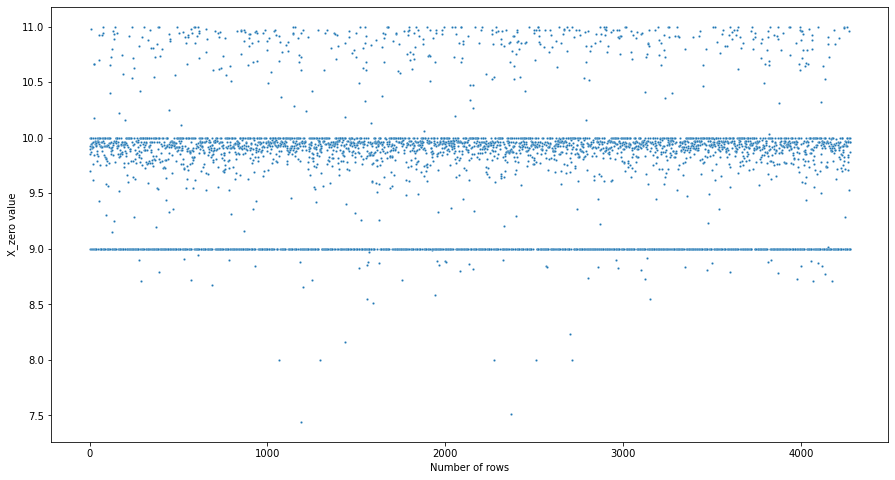

In [49]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=test_filna, x=range(len(test_filna)), y=test_filna.X_zero.values,s=5)
plt.xlabel('Number of rows')
plt.ylabel('X_zero value')

Based on distribution of "X_zero" excluding the "Age" and "HomePlanet" features for the train dataset predict the probabilities of categories for each chosen intervals.    

In [50]:
import random

In [51]:
def shuffled_trues(n, m):
    trues = [True]*n
    falses = [False]*m
    trues.extend(falses)
    random.shuffle(trues)
    return trues
     

In [52]:
trues_1 = shuffled_trues(1852,592)#<=9

In [53]:
trues_2 = shuffled_trues(1157,2871)#>9 <10

In [54]:
trues_3 = shuffled_trues(972,246)#==10

In [55]:
trues_4 = shuffled_trues(309,576)#>10 <11

In [56]:
trues_5 = shuffled_trues(88,30)#==11

In [57]:
def most_frequent_value(trues_list, n):
        l = []
        for _ in range(n): 
            l.append(random.choice(trues_list))
        if l.count(True) > l.count(False):
            return True
        else:
            return False


Finnaly, let's try to predict the category label in the test set based on 'X_zero' value.

In [58]:
n = 3#Number of trials
predictions = []

for i in test_filna['X_zero']:
    if i <= 9:
        predictions.append(most_frequent_value(trues_1, n))
    elif i < 10:
        predictions.append(most_frequent_value(trues_2, n))
    elif i == 10:
        predictions.append(most_frequent_value(trues_3, n))
    elif i < 11:
        predictions.append(most_frequent_value(trues_4, n))
    elif i == 11:
        predictions.append(most_frequent_value(trues_5, n))


As the entire dataset (train and test sets) is imported from Kaggle, load the predictions for n in set {3,5,21,51, 101} and get the accuracy score from a website and plot the results.

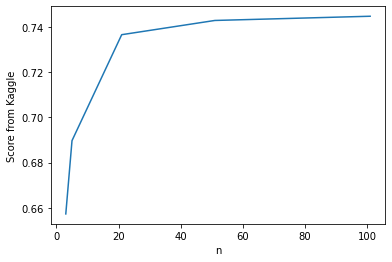

In [3]:
plt.plot([3,5,21,51, 101],[0.65723, 0.68973, 0.73673, 0.74304, 0.74491]);
plt.xlabel('n');
plt.ylabel('Score from Kaggle');

We can see that with increasing of n the accuracy score is also increasing; from range of n from 3 to 21 the accuracy is dramatically increase but with further increasing of n has a little effect. 